In [1]:

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
KO_rev = pd.read_csv('C:/Users/shree/Downloads/KO_Quarterly_Revenue.csv',index_col='time',parse_dates=True)

In [3]:
decompose_result = seasonal_decompose(KO_rev['Revenue'],model='multiplicative')

In [4]:
KO_rev.index.freq="Q"
alpha=0.125

<AxesSubplot:title={'center':'H-W Single Exponential Smoothing'}, xlabel='time'>

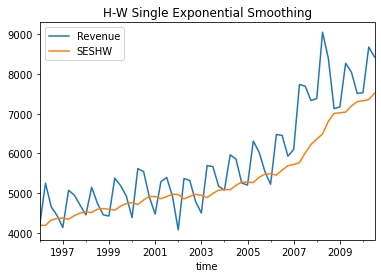

In [5]:
KO_rev['SESHW']=SimpleExpSmoothing(KO_rev['Revenue']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
KO_rev[['Revenue','SESHW']].plot(title='H-W Single Exponential Smoothing')

              Additive  Multiplicative
$\alpha$  2.610727e-01    2.878571e-01
$\beta$   6.491196e-02    1.000000e-04
$\phi$             NaN             NaN
$\gamma$           NaN             NaN
$l_0$     4.512878e+03    4.511000e+03
$b_0$     3.051316e+01    1.025805e+00
SSE       2.049052e+07    2.485090e+07


C:\Users\shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


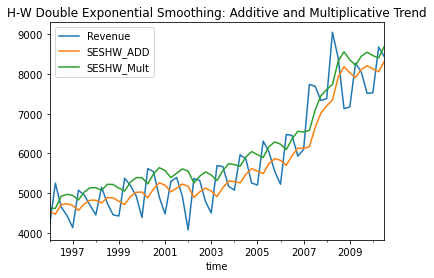

In [33]:
add = ExponentialSmoothing(KO_rev['Revenue'],trend='add',).fit()
results = pd.DataFrame( index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"])
params = [ "smoothing_level", "smoothing_trend","damping_trend","smoothing_seasonal","initial_level","initial_trend"]
results["Additive"] = [add.params[p] for p in params] + [add.sse]

#results["Additive Dam"] = [fitt.params[p] for p in params] + [fit3.sse]
#results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]    
    
KO_rev['SESHW_ADD'] = ExponentialSmoothing(KO_rev['Revenue'],trend='add').fit().fittedvalues

mlt=ExponentialSmoothing(KO_rev['Revenue'],trend='mul').fit()
KO_rev['SESHW_Mult'] = ExponentialSmoothing(KO_rev['Revenue'],trend='mul').fit().fittedvalues
results["Multiplicative"] = [mlt.params[p] for p in params] + [mlt.sse]

KO_rev[['Revenue','SESHW_ADD','SESHW_Mult']].plot(title='H-W Double Exponential Smoothing: Additive and Multiplicative Trend')

print(results)

C:\Users\shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


              Additive  Multiplicative
$\alpha$  2.610727e-01    2.878571e-01
$\beta$   6.491196e-02    1.000000e-04
$\phi$             NaN             NaN
$\gamma$           NaN             NaN
$l_0$     4.512878e+03    4.511000e+03
$b_0$     3.051316e+01    1.025805e+00
SSE       2.049052e+07    2.485090e+07


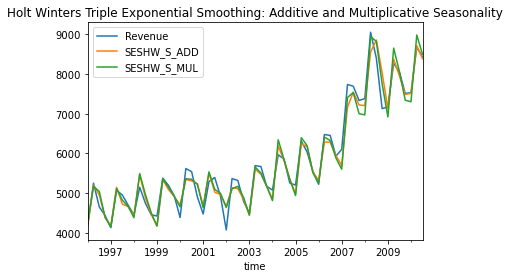

In [35]:
results1 = pd.DataFrame( index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"])
params = [ "smoothing_level", "smoothing_trend","damping_trend","smoothing_seasonal","initial_level","initial_trend"]
add=ExponentialSmoothing(KO_rev['Revenue'],trend='add',seasonal='add',seasonal_periods=4).fit()
results1["Additive"] = [add.params[p] for p in params] + [add.sse]
KO_rev['SESHW_S_ADD'] = ExponentialSmoothing(KO_rev['Revenue'],trend='add',seasonal='add',seasonal_periods=4).fit().fittedvalues
mlt=ExponentialSmoothing(KO_rev['Revenue'],trend='mul',seasonal='mul',seasonal_periods=4).fit()
results1["Multiplicative"] = [mlt.params[p] for p in params] + [mlt.sse]
KO_rev['SESHW_S_MUL'] = ExponentialSmoothing(KO_rev['Revenue'],trend='mul',seasonal='mul',seasonal_periods=4).fit().fittedvalues
KO_rev[['Revenue','SESHW_S_ADD','SESHW_S_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
print(results)

In [10]:
forecast_data = pd.read_csv('C:/Users/shree/Downloads/KO_Quarterly_Revenue.csv',index_col='time',parse_dates=True)
forecast_data.index.freq = 'Q'
train_rev = forecast_data[:]

C:\Users\shree\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='time'>

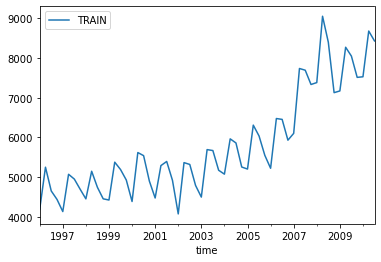

In [11]:
fitted_model = ExponentialSmoothing(train_rev['Revenue'],trend='mul',seasonal='mul',seasonal_periods=4).fit()
test_predictions = fitted_model.forecast(20)
train_rev['Revenue'].plot(legend=True,label='TRAIN')

<AxesSubplot:>

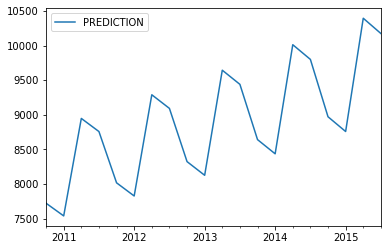

In [12]:
test_predictions.plot(legend=True,label='PREDICTION')#,xlim=['2010–12–31','2012–09–30'])